Network
    - weighted network
    - signed netwok
    - multigraph
    - bipartite graph
        ~ bipartite graph projection

In [2]:
import networkx as nx

## Объект Граф

Undirected network

In [31]:
G1 = nx.Graph()
G1.add_edge('A', 'B')
G1.add_edge('B', 'C')
G1.add_node('A', role='teacher')
G1.nodes(data=True)

[('A', {'role': 'teacher'}), ('B', {}), ('C', {})]

Directed network

In [29]:
G2 = nx.DiGraph()
G2.add_edge('A', 'B', weight=6)
G2.add_edge('B', 'A', weight=3)
G2.edge['A']['B'], G2.edge['B']['A']

({'weight': 6}, {'weight': 3})

Weighted network

In [60]:
G3 = nx.Graph()
G3.add_edge('A', 'B', weight=6)
G3.remove_edge('A', 'B')

Signed network

In [64]:
G3 = nx.Graph()
G3.add_edge('A', 'B', sign='+')
G3.edges(data=True)

[('A', 'B', {'sign': '+'})]

In [22]:
G4 = nx.Graph()
G4.add_edge('A', 'B', relation='friend')

Multigraph

In [28]:
G5 = nx.MultiGraph()
G5.add_edge('A', 'B', weight=6, relation='friend')
G5.add_edge('A', 'B', weight=8, relation='coworkers')

1

Directed Multigraph

In [43]:
G6 = nx.MultiDiGraph()

## Аттрибуты класса Граф

In [37]:
G1.edges()

AtlasView({0: {'relation': 'friend', 'weight': 6}, 1: {'relation': 'coworkers', 'weight': 8}})

In [29]:
G5.edges(data=True)

MultiEdgeDataView([('A', 'B', {'relation': 'friend', 'weight': 6}), ('A', 'B', {'relation': 'coworkers', 'weight': 8})])

In [30]:
G5.edges(data='relation')

MultiEdgeDataView([('A', 'B', 'friend'), ('A', 'B', 'coworkers')])

In [38]:
G5['A']['B']

AtlasView({0: {'relation': 'friend', 'weight': 6}, 1: {'relation': 'coworkers', 'weight': 8}})

In [41]:
G5['A']['B'][0]['weight']

6

In [45]:
G5.nodes

NodeView(('A', 'B'))

In [65]:
G1.nodes(data=True)

[('A', {'role': 'teacher'}), ('B', {}), ('C', {})]

In [67]:
G1.node['A']['role']

'teacher'

## Модуль bipartite

Bipartite graph

In [6]:
from networkx.algorithms import bipartite

In [13]:
G7 = nx.Graph()
G7.add_nodes_from(['A','B','C','D','E'], bipartite=0) #вершины класса 0
G7.add_nodes_from([1,2,3,4], bipartite=1)             #вершины класса 1
G7.add_edges_from([('A',1), ('B',1), ('C',1), ('C',3), ('D',2), ('E',3), ('E',4)])

In [8]:
bipartite.is_bipartite(G7)

True

У данного графа 2 связности и при попыте поделить его на 2 части, возникнет ambiguity. Поэтому добавим еще одно ребро.

In [11]:
G7.add_edge('D', 3)

In [12]:
bipartite.sets(G7)

({'A', 'B', 'C', 'D', 'E'}, {1, 2, 3, 4})

Посмотрим по бипартивному глафу L-бипартивную проекцию графа.

In [4]:
G8 = nx.Graph()
G8.add_edges_from([('A',1), ('B',1), ('C',1), ('D', 1), ('H', 1), ('B', 2), ('C', 2), ('D',2), ('E', 2),
                   ('G', 2), ('E',3), ('F', 3), ('H', 3), ('J', 3), ('E',4), ('I', 4), ('J', 4)])

In [8]:
X = bipartite.sets(G8)[0]
X

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

In [11]:
P = bipartite.projected_graph(G8, X)
P.edges()

[('G', 'E'),
 ('G', 'B'),
 ('G', 'C'),
 ('G', 'D'),
 ('E', 'B'),
 ('E', 'C'),
 ('E', 'H'),
 ('E', 'D'),
 ('E', 'J'),
 ('E', 'I'),
 ('E', 'F'),
 ('B', 'C'),
 ('B', 'H'),
 ('B', 'D'),
 ('B', 'A'),
 ('C', 'H'),
 ('C', 'D'),
 ('C', 'A'),
 ('H', 'D'),
 ('H', 'A'),
 ('H', 'J'),
 ('H', 'F'),
 ('D', 'A'),
 ('J', 'F'),
 ('J', 'I')]

А теперь R-бипартивную.

In [12]:
X = bipartite.sets(G8)[1]
X

{1, 2, 3, 4}

In [13]:
P = bipartite.projected_graph(G8, X)
P.edges()

[(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]

Чтобы как-то отразить количество общих соседей для двух вершин в проекции, введем веса.

In [16]:
P_weighted = bipartite.weighted_projected_graph(G8, X)
P_weighted.edges(data=True)

[(1, 2, {'weight': 3}),
 (1, 3, {'weight': 1}),
 (2, 3, {'weight': 1}),
 (2, 4, {'weight': 1}),
 (3, 4, {'weight': 2})]

## Визуализация

In [60]:
%matplotlib notebook

<IPython.core.display.Javascript object>


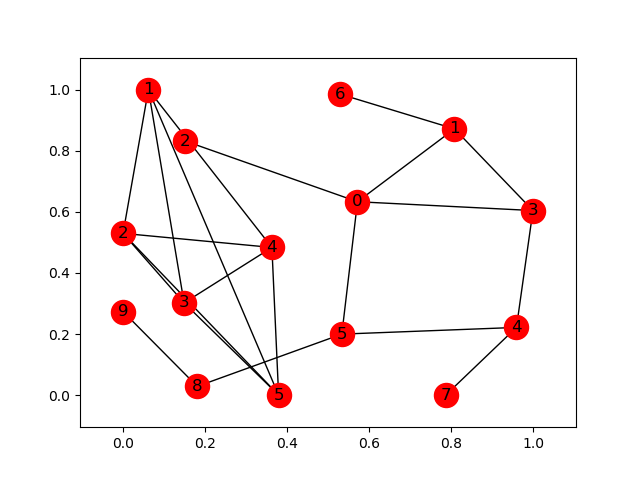

In [21]:
nx.draw_networkx(G1)

## Test 1

In [36]:
import networkx as nx

G=nx.MultiGraph()
G.add_node('A',role='manager')
G.add_edge('A','B',relation = 'friend')
G.add_edge('A','C', relation = 'business partner')
G.add_edge('A','B', relation = 'classmate')
G.node['A']['role'] = 'team member'
G.node['B']['role'] = 'engineer'
G.edge['A']['B'][0]['relation']

'friend'

In [39]:
import networkx as nx

G=nx.MultiGraph()
G.add_node('A',role='manager')
G.add_edge('A','B',relation = 'friend')
G.add_edge('A','C', relation = 'business partner')
G.add_edge('A','B', relation = 'classmate')
G.node['A']['role'] = 'team member'
G.node['B']['role'] = 'engineer'
G.node['A']['role']

'team member'

In [56]:
G = nx.Graph()
G.add_nodes_from(['A','B','C','D','E', 1, 2, 3, 4, 5])
G.add_edges_from([('A',1), ('A', 2), ('A', 3), ('A', 4), ('A', 5), ('B',2), ('C',3), ('C', 4), ('C', 5), ('D',2), ('D', 4), ('E',5)])

In [57]:
bipartite.is_bipartite(G)

True

<IPython.core.display.Javascript object>


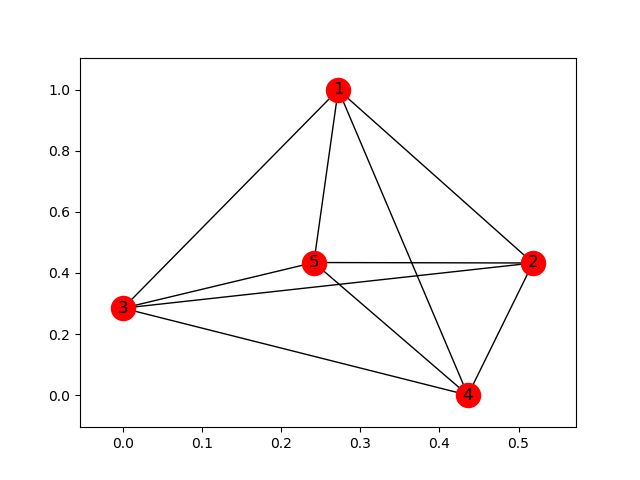

In [61]:
P = bipartite.weighted_projected_graph(G, {1, 2, 3, 4, 5})
nx.draw_networkx(P)

In [63]:
P = bipartite.weighted_projected_graph(G, {'A', 'B', 'C', 'D', 'E'})
P.edges(data=True)

[('E', 'C', {'weight': 1}),
 ('E', 'A', {'weight': 1}),
 ('B', 'A', {'weight': 1}),
 ('B', 'D', {'weight': 1}),
 ('C', 'D', {'weight': 1}),
 ('C', 'A', {'weight': 3}),
 ('D', 'A', {'weight': 2})]